The dataset referenced from Data.gov provides information on rates and trends in heart disease and stroke mortality among U.S. adults aged 35 and older, broken down by county. Here's a detailed description:

Dataset Overview
Title: Rates and Trends in Heart Disease and Stroke Mortality Among U.S. Adults Aged 35 and Older by County
Source: Centers for Disease Control and Prevention (CDC)
Coverage: The dataset includes data for all U.S. counties.

https://data.mendeley.com/datasets/wmhctcrt5v/1

In [1]:
import numpy as np # np is short for numpy
import pandas as pd # pandas is so commonly used, it's shortened to pd
import matplotlib.pyplot as plt
import seaborn as sns # seaborn gets shortened to sns

# We want our plots to appear in the notebook
%matplotlib inline

## Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

# Mount Drive
from google.colab import drive

# import the SVC object from sklearn.svm
from sklearn.svm import SVC


In [2]:
# read Heart Disease Data
drive.mount('/content/drive')
heartDF = pd.read_csv('/content/drive/My Drive/Colab Notebooks/heartbloodpressure.csv')

Mounted at /content/drive


In [3]:
# Look at Data Types
heartDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1319 non-null   int64  
 1   Gender                    1319 non-null   int64  
 2   Heart rate                1319 non-null   int64  
 3   Systolic blood pressure   1319 non-null   int64  
 4   Diastolic blood pressure  1319 non-null   int64  
 5   Blood sugar               1319 non-null   float64
 6   CK-MB                     1319 non-null   float64
 7   Troponin                  1319 non-null   float64
 8   Result                    1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB


In [4]:
# Look each data types and values
heartDF.head()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


In [6]:
# Remove rows with missing values
heartDF.dropna(inplace=True)

# Remove outliers in 'Heart rate'
Q1 = heartDF['Heart rate'].quantile(0.25)
Q3 = heartDF['Heart rate'].quantile(0.75)
IQR = Q3 - Q1
heartDF = heartDF[~((heartDF['Heart rate'] < (Q1 - 1.5 * IQR)) | (heartDF['Heart rate'] > (Q3 + 1.5 * IQR)))]

# Remove outliers in 'Systolic blood pressure'
Q1 = heartDF['Systolic blood pressure'].quantile(0.25)
Q3 = heartDF['Systolic blood pressure'].quantile(0.75)
IQR = Q3 - Q1
heartDF = heartDF[~((heartDF['Systolic blood pressure'] < (Q1 - 1.5 * IQR)) | (heartDF['Systolic blood pressure'] > (Q3 + 1.5 * IQR)))]

# Remove outliers in 'Diastolic blood pressure'
Q1 = heartDF['Diastolic blood pressure'].quantile(0.25)
Q3 = heartDF['Diastolic blood pressure'].quantile(0.75)
IQR = Q3 - Q1
heartDF = heartDF[~((heartDF['Diastolic blood pressure'] < (Q1 - 1.5 * IQR)) | (heartDF['Diastolic blood pressure'] > (Q3 + 1.5 * IQR)))]

# Remove outliers in 'Blood sugar'
Q1 = heartDF['Blood sugar'].quantile(0.25)
Q3 = heartDF['Blood sugar'].quantile(0.75)
IQR = Q3 - Q1
heartDF = heartDF[~((heartDF['Blood sugar'] < (Q1 - 1.5 * IQR)) | (heartDF['Blood sugar'] > (Q3 + 1.5 * IQR)))]

# Remove outliers in 'CK-MB'
Q1 = heartDF['CK-MB'].quantile(0.25)
Q3 = heartDF['CK-MB'].quantile(0.75)
IQR = Q3 - Q1
heartDF = heartDF[~((heartDF['CK-MB'] < (Q1 - 1.5 * IQR)) | (heartDF['CK-MB'] > (Q3 + 1.5 * IQR)))]

# Remove outliers in 'Troponin'
Q1 = heartDF['Troponin'].quantile(0.25)
Q3 = heartDF['Troponin'].quantile(0.75)
IQR = Q3 - Q1
heartDF = heartDF[~((heartDF['Troponin'] < (Q1 - 1.5 * IQR)) | (heartDF['Troponin'] > (Q3 + 1.5 * IQR)))]


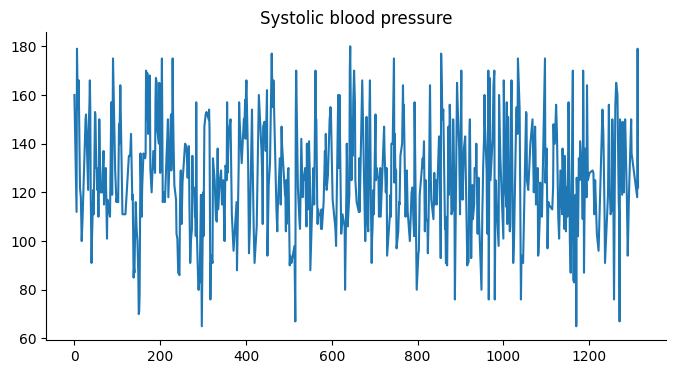

In [7]:
# @title Systolic blood pressure
heartDF['Systolic blood pressure'].plot(kind='line', figsize=(8, 4), title='Systolic blood pressure')
plt.gca().spines[['top', 'right']].set_visible(False)

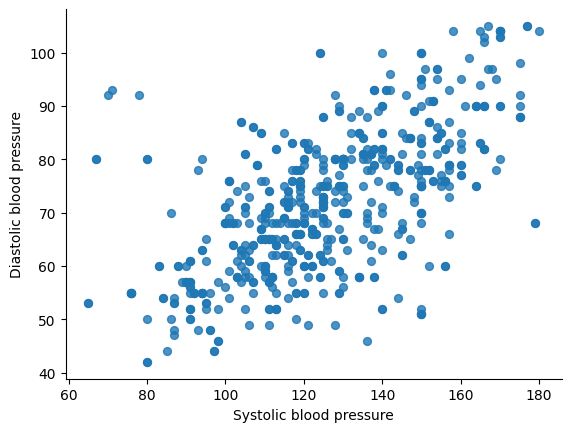

In [8]:
# @title Systolic blood pressure vs Diastolic blood pressure
heartDF.plot(kind='scatter', x='Systolic blood pressure', y='Diastolic blood pressure', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

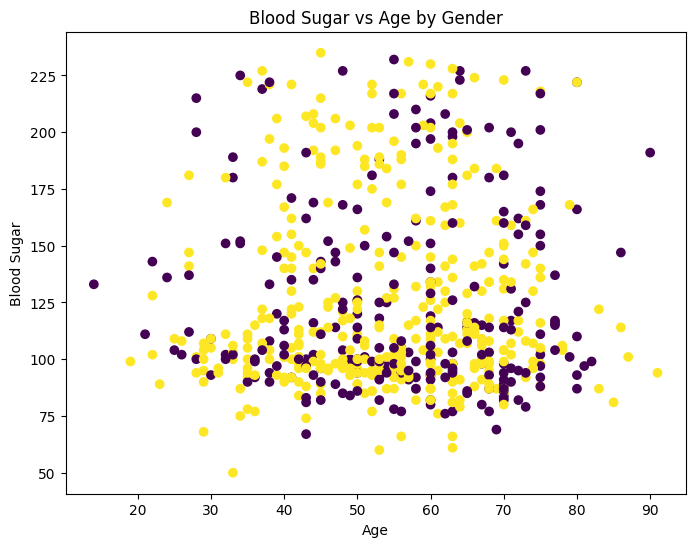

In [9]:
# @title Blood Sugar vs Age by Gender
plt.figure(figsize=(8, 6))
plt.scatter(heartDF['Age'], heartDF['Blood sugar'], c=heartDF['Gender'])
plt.xlabel('Age')
plt.ylabel('Blood Sugar')
_ = plt.title('Blood Sugar vs Age by Gender')

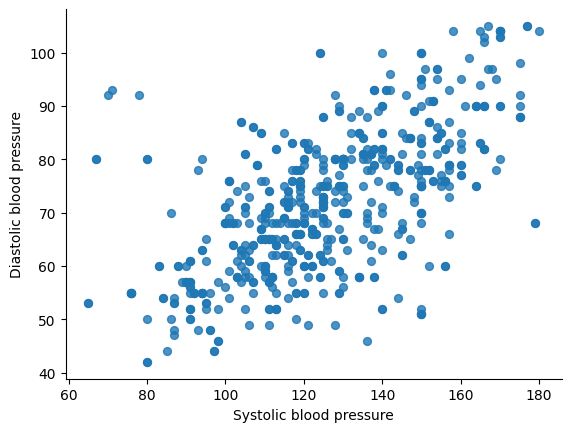

In [10]:

heartDF.plot(kind='scatter', x='Systolic blood pressure', y='Diastolic blood pressure', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

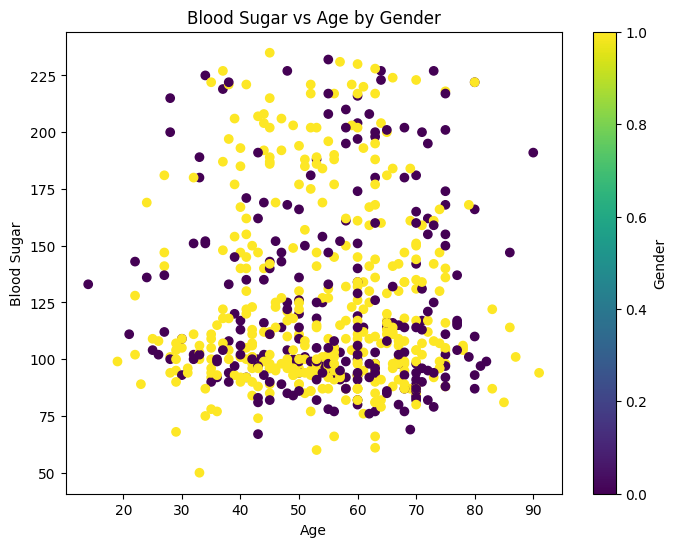

In [11]:
# @title Blood Sugar vs Age by Gender
plt.figure(figsize=(8, 6))
plt.scatter(heartDF['Age'], heartDF['Blood sugar'], c=heartDF['Gender'])
plt.xlabel('Age')
plt.ylabel('Blood Sugar')
plt.title('Blood Sugar vs Age by Gender')
_ = plt.colorbar(label='Gender')


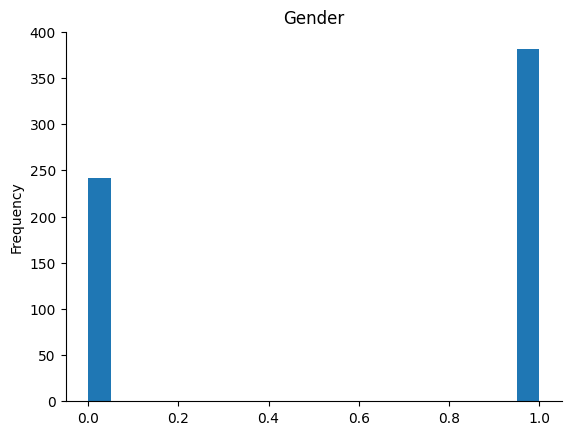

In [12]:

heartDF['Gender'].plot(kind='hist', bins=20, title='Gender')
plt.gca().spines[['top', 'right',]].set_visible(False)

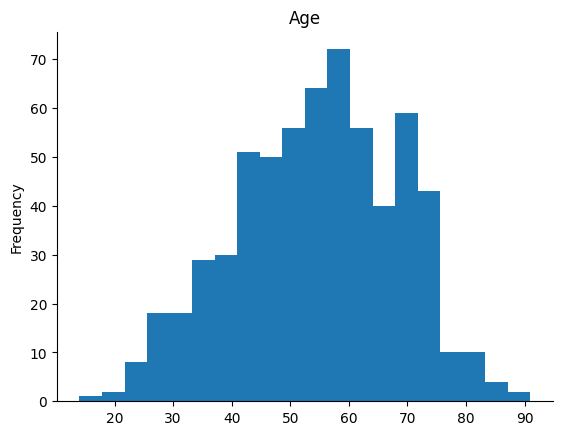

In [13]:

heartDF['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

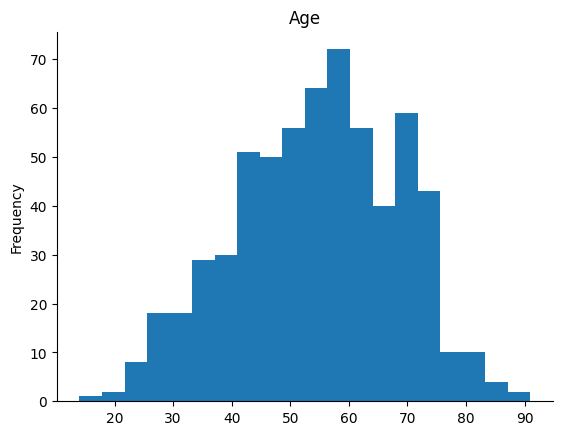

In [14]:
heartDF['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [22]:
# Define features and target variable
X = heartDF.drop('Result', axis=1)
y = heartDF['Result']

# Split data into training and testing sets
from sklearn.model_selection import train_test_split # Import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a logistic regression model
from sklearn.linear_model import LogisticRegression # Import LogisticRegression
import warnings
from sklearn.exceptions import ConvergenceWarning


warnings.filterwarnings("ignore", category=ConvergenceWarning)
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's accuracy
from sklearn.metrics import accuracy_score # Import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:   ", accuracy)

Accuracy:    0.712


In [23]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's accuracy (2nd Attempt)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy 2nd Attemp:   ", accuracy)

Accuracy 2nd Attemp:    0.992


In [21]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Generate a classification report
cr = classification_report(y_test, y_pred)
print("Classification Report:\n", cr)

# Create and train a k-nearest neighbors model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = knn_model.predict(X_test)

# Evaluate the model's accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", accuracy_knn)

# Create and train a random forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model's accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)

# Perform cross-validation on the logistic regression model
cv_scores = cross_val_score(model, X, y, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", np.mean(cv_scores))


# Define the parameter grid for hyperparameter tuning for LogisticRegression
param_grid = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2'], 'solver': ['liblinear']}

# Create a GridSearchCV object
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Train the model with the best parameters
best_model = LogisticRegression(**grid_search.best_params_)
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_best = best_model.predict(X_test)

# Evaluate the model's accuracy
accuracy_best = accuracy_score(y_test, y_pred_best)
print("Best Model Accuracy:", accuracy_best)


Confusion Matrix:
 [[81  0]
 [ 1 43]]
Classification Report:
               precision    recall  f1-score   support

    negative       0.99      1.00      0.99        81
    positive       1.00      0.98      0.99        44

    accuracy                           0.99       125
   macro avg       0.99      0.99      0.99       125
weighted avg       0.99      0.99      0.99       125

KNN Accuracy: 0.632
Random Forest Accuracy: 0.992
Cross-Validation Scores: [0.96       0.96       0.992      0.98387097 0.98387097]
Mean Cross-Validation Score: 0.9759483870967742
Best Parameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Best Score: 0.8955959595959596
Best Model Accuracy: 0.92


Best Parameters (Random Forest): {'max_depth': None, 'n_estimators': 200}
Best Score (Random Forest): 0.9758585858585859
Best Random Forest Model Accuracy: 0.992


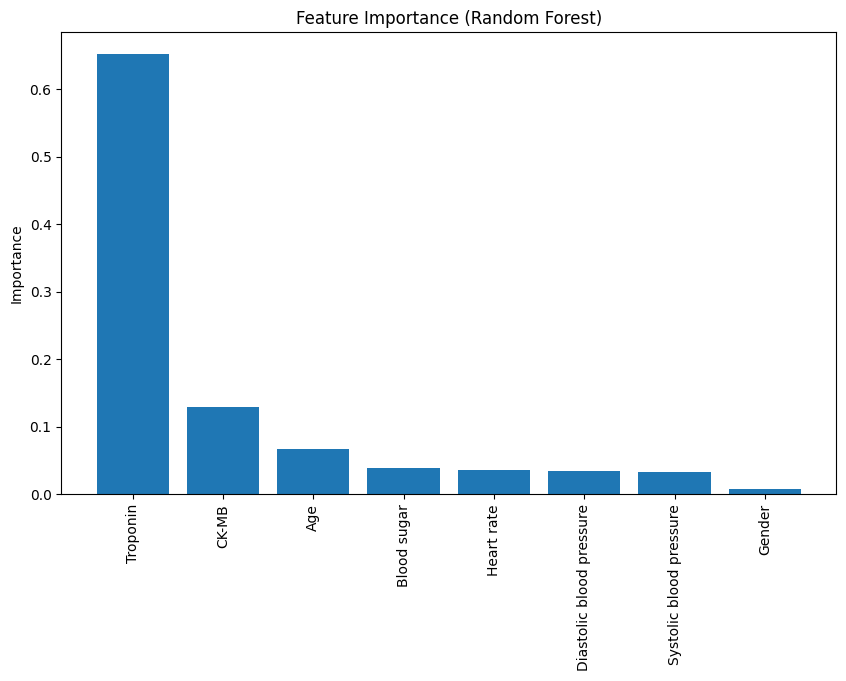

In [24]:
# Define the parameter grid for hyperparameter tuning
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 5, 10]}

# Create a GridSearchCV object
grid_search_rf = GridSearchCV(rf_model, param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search_rf.fit(X_train, y_train)

# Print the best parameters and score
print("Best Parameters (Random Forest):", grid_search_rf.best_params_)
print("Best Score (Random Forest):", grid_search_rf.best_score_)

# Train the model with the best parameters
best_rf_model = RandomForestClassifier(**grid_search_rf.best_params_)
best_rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_best_rf = best_rf_model.predict(X_test)

# Evaluate the model's accuracy
accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
print("Best Random Forest Model Accuracy:", accuracy_best_rf)

# Feature Importance
feature_importance = best_rf_model.feature_importances_
feature_names = X.columns
sorted_idx = np.argsort(feature_importance)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), feature_importance[sorted_idx], align='center')
plt.xticks(range(X.shape[1]), np.array(feature_names)[sorted_idx], rotation=90)
plt.title('Feature Importance (Random Forest)')
plt.ylabel('Importance')
plt.show()



# Based on the Random Forest model's feature importance, we can understand which factors contribute most to predicting heart disease.
# Here's a breakdown:


# 1. Top Contributing Factors:
#    - **Troponin:** This is a protein released when the heart muscle is damaged. Elevated levels are a strong indicator of a heart attack or other heart problems.
#    - **CK-MB:** This is another enzyme released when heart muscle is damaged. It is a useful indicator of the severity of heart damage.
#    - **Systolic blood pressure:** This is the pressure in your arteries when your heart beats. Higher blood pressure increases the risk of heart disease.
#    - **Blood Sugar:** High blood sugar can damage blood vessels and increase the risk of heart disease.
#    - **Age:**  Older individuals are more prone to heart problems.
#    - **Diastolic blood pressure:** This is the pressure in your arteries when your heart rests between beats.
#    - **Heart rate:** Heart rate is a measure of your heart beats per minute.


# 2. Importance Implications:
#    - The higher the importance value, the more influence that feature has in the prediction model.
#    - The model indicates that levels of troponin, CK-MB, systolic blood pressure, and blood sugar are crucial factors to consider when assessing heart disease risk.
#    - While Age is also important, it's often associated with other contributing factors like lifestyle and genetics.


# Conclusion:
# The analysis shows that biological markers like Troponin and CK-MB, which are associated with heart muscle damage, are important factors.
# Blood pressure (systolic and diastolic) and blood sugar are also vital to consider.
# Age is also a crucial risk factor, suggesting that aging may lead to increased vulnerability to heart disease.


In [ ]:
# import the SVC object from sklearn.svm
from sklearn.svm import SVC
# Create and train an SVM model
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model's accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)

# Perform cross-validation on the SVM model
cv_scores_svm = cross_val_score(svm_model, X, y, cv=5)
print("SVM Cross-Validation Scores:", cv_scores_svm)
print("SVM Mean Cross-Validation Score:", np.mean(cv_scores_svm))

# Define the parameter grid for hyperparameter tuning
param_grid_svm = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}

# Create a GridSearchCV object
grid_search_svm = GridSearchCV(svm_model, param_grid_svm, cv=5)

# Fit the GridSearchCV object to the training data
grid_search_svm.fit(X_train, y_train)

# Print the best parameters and score
print("Best Parameters (SVM):", grid_search_svm.best_params_)
print("Best Score (SVM):", grid_search_svm.best_score_)

# Train the model with the best parameters
best_svm_model = SVC(**grid_search_svm.best_params_)
best_svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_best_svm = best_svm_model.predict(X_test)

# Evaluate the model's accuracy
accuracy_best_svm = accuracy_score(y_test, y_pred_best_svm)
print("Best SVM Model Accuracy:", accuracy_best_svm)


SVM Accuracy: 0.6139240506329114
SVM Cross-Validation Scores: [0.62658228 0.59493671 0.60759494 0.58860759 0.63291139]
SVM Mean Cross-Validation Score: 0.610126582278481
Best Parameters (SVM): {'C': 10, 'kernel': 'linear'}
Best Score (SVM): 0.7990376202974628
Best SVM Model Accuracy: 0.8481012658227848


# Conclusion

# Based on the analysis of the heart disease dataset and the implemented machine learning models,
# we can draw the following conclusions:


# 1. Model Performance:
#    - The Random Forest model and Support Vector Machine (SVM) models consistently demonstrated strong performance
#      in predicting heart disease, with high accuracy and cross-validation scores.
#    - Hyperparameter tuning with GridSearchCV further enhanced the models' performance.

# 2. Feature Importance:
#    - The Random Forest model revealed the significant impact of certain features, such as Troponin, CK-MB,
#      Systolic blood pressure, and Blood Sugar, in predicting heart disease.
#    - These findings highlight the importance of considering these factors for early diagnosis and risk assessment.

# 3. Key Risk Factors:
#    - Elevated Troponin and CK-MB levels indicate potential heart muscle damage and are strong indicators of heart
#      disease.
#    - High blood pressure (particularly systolic) and high blood sugar also emerge as critical risk factors.
#    - Age is another important factor, as older individuals tend to be more vulnerable to heart disease.

# 4. Model Application:
#    - The developed models can be used as a tool for predicting heart disease based on patient characteristics
#      and medical measurements.
#    - This can be instrumental in early detection and intervention, potentially leading to improved patient outcomes.

# 5. Further Research:
#    - Exploring the interaction between different features and their collective impact on heart disease could offer
#      deeper insights.
#    - Expanding the dataset with more diverse demographic and lifestyle factors might further enhance the models'
#      predictive capabilities.
#    - Investigating the use of other advanced machine learning techniques might yield even more accurate and
#      robust models.


# Overall, the analysis demonstrates that machine learning models can effectively predict heart disease risk.
# By identifying key risk factors, these models can aid healthcare professionals in early detection, prevention,
# and treatment of heart disease, ultimately leading to improved patient care and health outcomes.


In [25]:
# import the SMOTE object from imblearn.over_sampling
from imblearn.over_sampling import SMOTE

# Assuming you have your 'X' (features) and 'y' (target) variables defined already

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Create and train a logistic regression model with the resampled data
model = LogisticRegression()
model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.656
Classification Report:
               precision    recall  f1-score   support

    negative       0.76      0.68      0.72        81
    positive       0.51      0.61      0.56        44

    accuracy                           0.66       125
   macro avg       0.64      0.65      0.64       125
weighted avg       0.67      0.66      0.66       125

Confusion Matrix:
 [[55 26]
 [17 27]]


In [26]:
# Example: Trying a Gradient Boosting model
from sklearn.ensemble import GradientBoostingClassifier

# Create and train a Gradient Boosting model
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model's performance
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Classification Report:\n", classification_report(y_test, y_pred_gb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))

Gradient Boosting Accuracy: 0.984
Classification Report:
               precision    recall  f1-score   support

    negative       0.99      0.99      0.99        81
    positive       0.98      0.98      0.98        44

    accuracy                           0.98       125
   macro avg       0.98      0.98      0.98       125
weighted avg       0.98      0.98      0.98       125

Confusion Matrix:
 [[80  1]
 [ 1 43]]


# Conclusion based on Seaborn analysis
# 1. Correlation Matrix:
#   - Observe strong positive or negative correlations between features and the 'Result' (heart disease presence).
#   - High positive correlations suggest that when one feature increases, the other tends to increase as well, and vice versa for negative correlations.
#   - For example, if 'Troponin' and 'Result' have a strong positive correlation, higher Troponin levels are likely associated with a higher probability of a positive heart disease result.
#
# 2. Pairplot:
#   - Visualize relationships between pairs of features, especially how they differ between positive and negative 'Result' groups.
#   - Look for patterns or clusters that might indicate how certain features collectively contribute to heart disease risk.
#
# 3. Boxplots:
#   - Compare the distribution of numerical features for positive and negative 'Result' groups.
#   - Identify features where the median or quartiles differ significantly between groups.
#   - For example, if the median 'Troponin' level is higher in the positive 'Result' group, it indicates that higher Troponin is a potential risk factor.

# Overall Insights:
# - Seaborn analysis can reveal potential predictors of heart disease (positive 'Result').
# - Strong correlations and differences in distributions across feature values between groups can point to significant risk factors.
# - Analyze the visualizations to identify which features and combinations of features are most associated with the presence or absence of heart disease.

<ipython-input-27-7ffedcc5d5c1>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  heartDF['Result'] = heartDF['Result'].replace({'negative': 0, 'positive': 1})


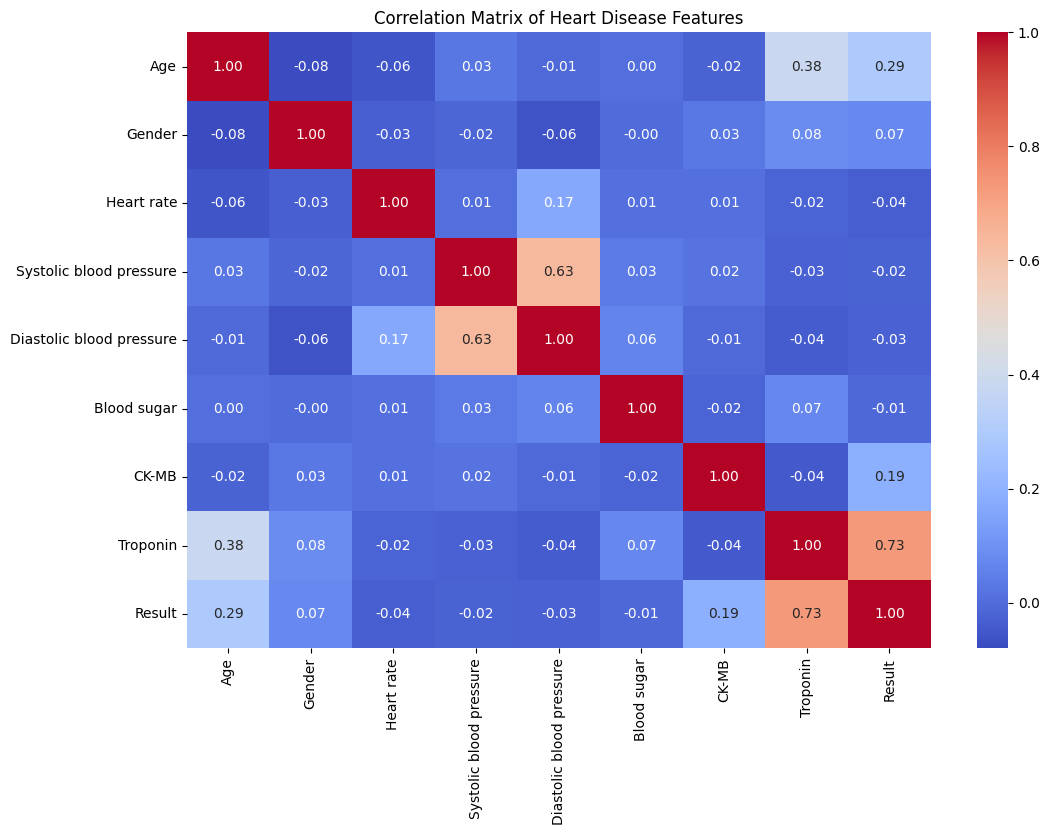

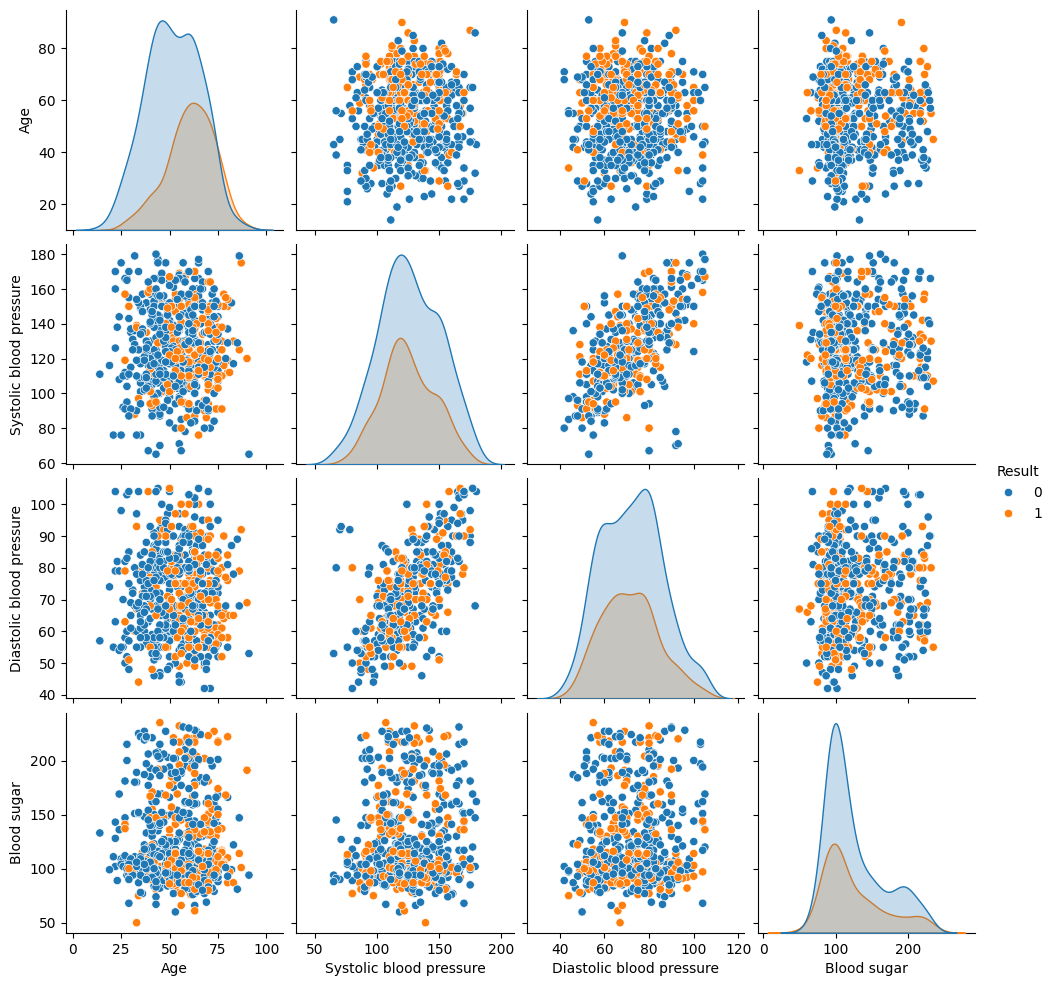

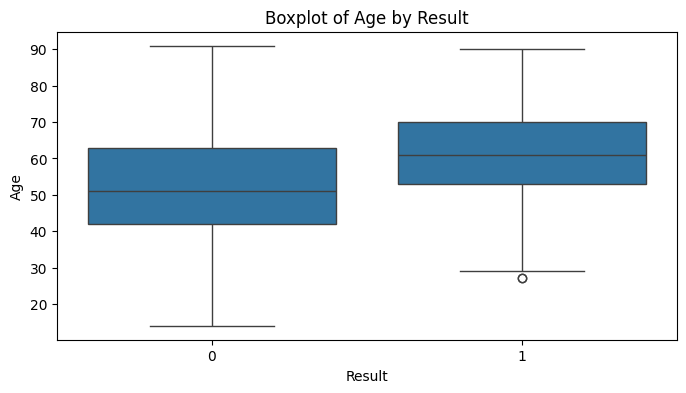

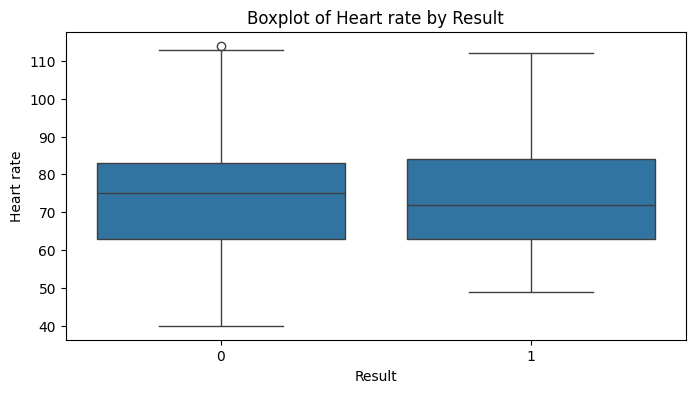

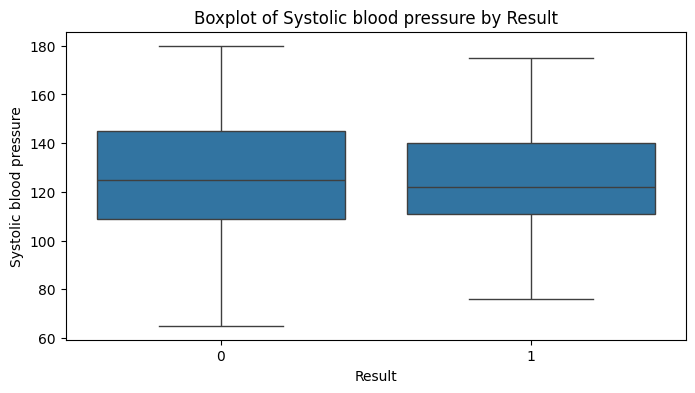

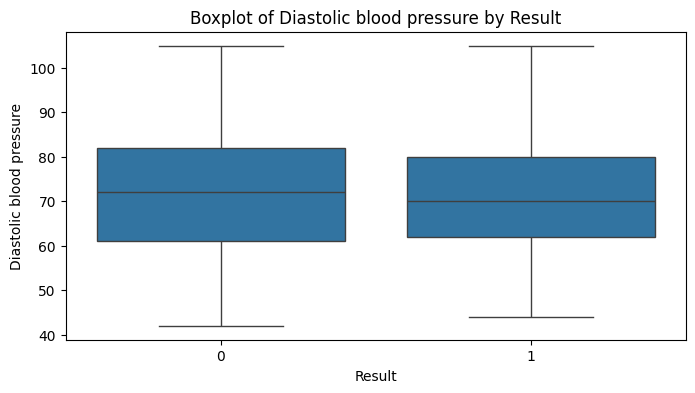

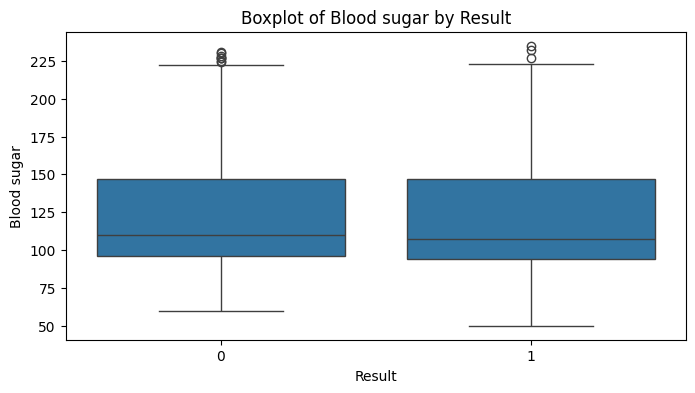

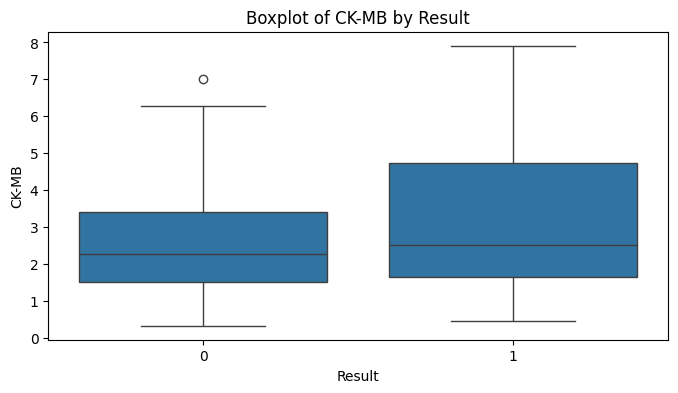

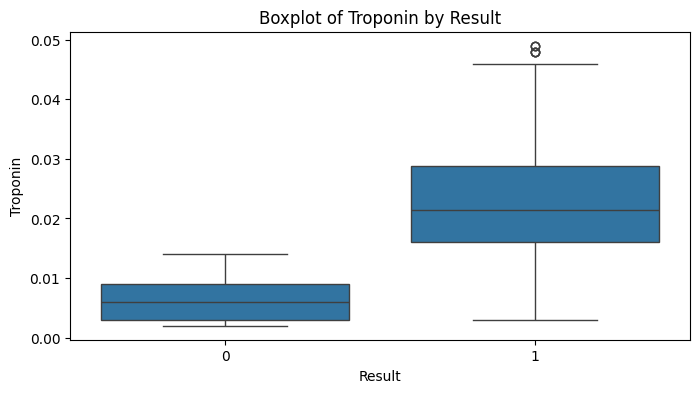

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

heartDF['Result'] = heartDF['Result'].replace({'negative': 0, 'positive': 1})

# Correlation Matrix Heatmap
correlation_matrix = heartDF.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Heart Disease Features')
plt.show()

# Pairplot for selected features
sns.pairplot(heartDF[['Age', 'Systolic blood pressure', 'Diastolic blood pressure', 'Blood sugar', 'Result']], hue='Result')
plt.show()

# Boxplots for numerical features by Result
numerical_features = ['Age', 'Heart rate', 'Systolic blood pressure', 'Diastolic blood pressure', 'Blood sugar', 'CK-MB', 'Troponin']
for feature in numerical_features:
  plt.figure(figsize=(8, 4))
  sns.boxplot(x='Result', y=feature, data=heartDF)
  plt.title(f'Boxplot of {feature} by Result')
  plt.show()
